### Download the data and remove rows containing null values

In [1]:
# modules.data_module is a module we have created ourselves for useful data functions
import modules.data_module as dm
import pandas as pd

data_url = "https://corgis-edu.github.io/corgis/datasets/csv/graduates/graduates.csv"
data_path = "data/graduates.csv"

# Used to download and save for the first time
# dm.retrieve_data(data_url, save_to_file=True, save_path="data/graduates.csv")

data = dm.retrieve_data(data_path).set_index("Unnamed: 0")
data.index.name = "ID"

data

# Remove Salaries.Highest or Salaries.Lowest as the Salaries.Mean and Salaries.Median are of interest.
data = data.drop(["Salaries.Lowest", "Salaries.Highest"], axis=1)

# Remove all rows where any column in the row has a value of 0
data = data[(data != 0).all(1)]

# Remove all rows where column not equal to 1993 as 1993 was before the Dotcom Bubble from 1995-2001.
# As we don't have more data before 1993, it wouldn't make sense to use that data as we don't know if the values
# were at peak, lower or the same before then.
data = (data[data['Year'] != 1993])
# The above causes decimals on Year. Let's get rid of those (so our plot doesnt show decimal years)
data['Year'] = data['Year'].astype(str).replace('\.0', '', regex=True)

# Remove all rows where Education.Major is not: 
# "Biological Sciences", "Chemical Engineering", "Chemistry", "Civil Engineering", "Computer Science and Math",
# "Economics", "Electrical Engineering", "Management & Administration", "Mechanical Engineering", "Other Engineering"
# "Physics and Astronomy" or "Psychology"
majors_of_interest = ["Biological Sciences", "Chemical Engineering", "Chemistry", "Civil Engineering", 
                      "Computer Science and Math", "Economics", "Electrical Engineering", "Management & Administration", 
                      "Mechanical Engineering", "Other Engineering","Physics and Astronomy", "Psychology"]
data = data.loc[data['Education.Major'].isin(majors_of_interest)]

data

,Year,Demographics.Total,Education.Major,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
ID,,,,,,,,,,,,,,,,,,,,,
47,1995,1338108,Biological Sciences,54523.54,47000.0,11130,35304.27,92708,119813,1123768,...,136147,190280,361380,559199,112097,101378,515192,276259,332595,397959
48,1995,217727,Chemical Engineering,58896.72,57000.0,2653,28778.97,29745,12644,175338,...,83604,70103,57016,94190,17303,26079,28119,59804,54763,21782
49,1995,507228,Chemistry,60697.60,57000.0,6617,35623.28,49393,36562,421046,...,76773,118959,122177,212421,44322,37343,123896,112055,109206,106965
50,1995,345038,Civil Engineering,51758.63,50000.0,3273,25567.75,39586,18806,286397,...,130860,64512,109209,205473,42050,30251,66465,112177,104112,28719
51,1995,1114519,Computer Science and Math,49672.61,47000.0,8079,27110.39,87310,103423,923026,...,282449,208889,292120,426032,75539,69947,133434,226475,260939,236202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2015,1154661,Electrical Engineering,109173.61,100000.0,4198,80239.79,375520,155870,623271,...,490703,425903,215384,546784,115154,271693,98310,280963,238210,162343
496,2015,950566,Mechanical Engineering,98533.83,90646.0,4143,65066.19,184209,117901,648456,...,503729,420590,240458,595890,87240,254214,108836,318860,267587,157312
503,2015,1306845,Other Engineering,96287.14,90000.0,4561,73037.23,235954,228427,842463,...,484937,449263,326931,721307,128705,299484,193296,433175,334061,241025


### Plot Salaries.Mean for the majors of interest

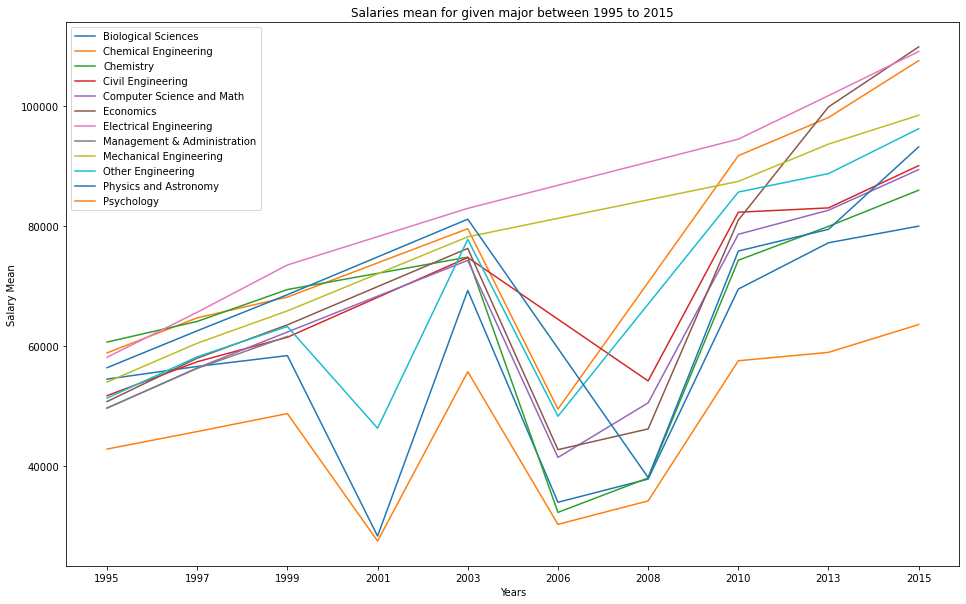

In [2]:
# smp = salary mean plot
smp_data = data
smp_label = "Education.Major"
smp_x = "Year"
smp_y = "Salaries.Mean"
smp_xlabel = "Years"
smp_ylabel = "Salary Mean"
smp_labels = majors_of_interest
smp_title = "Salaries mean for given major between 1995 to 2015"

dm.plot_data(smp_data, smp_label, smp_x, smp_y, smp_xlabel, smp_ylabel, smp_labels, smp_title)

### Observations on the Salary graph for given majors between 1995 to 2015
We can see that certain educations are rising in salary since the start (1995) and up to the end year (2015), such as Electrical Engineering. It could indicate that it has been highly demanded throughout all the years, hence the salary increase.
On the other hand, the salary of the majority of the educations appears to be affected by financial crisis that begun in early 2007. Because of that, most of the educations had a high decrease in the salary during this period, which is also shown on the graph above. But after the financial crisis ending in 2009, the majority of the educations, such as Chemistry, Computer Science and Chemical Engineering are now at a higher salary level than before the crisis.

- Note til os: Lav nogle overordnede konklusioner når vi har de andre grafer med og få den røde tråd frem. Ovenstående er blot "åbenlyse" observationer.

### Plot Demographics.Ethnicity for the majors of interest

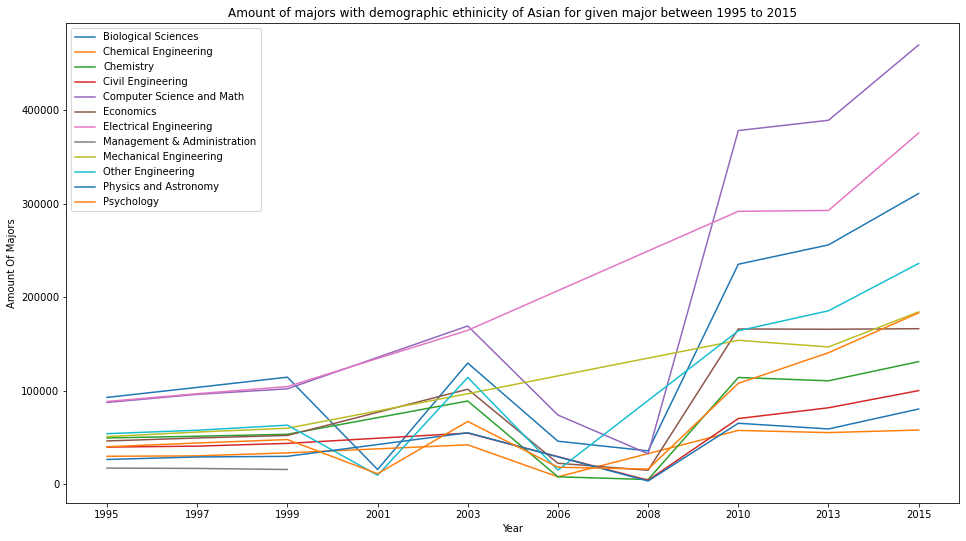

In [3]:
# deap = demographics ethnicity asians plot
deap_data = data
deap_label = "Education.Major"
deap_x = "Year"
deap_y = "Demographics.Ethnicity.Asians"
deap_xlabel = "Years"
deap_ylabel = "Amount Of Majors"
deap_labels = majors_of_interest
deap_title = "Amount of majors with demographic ethinicity of Asian for given major between 1995 to 2015"

dm.plot_data(deap_data, deap_label, deap_x, deap_y, deap_xlabel, deap_ylabel, deap_labels, deap_title)

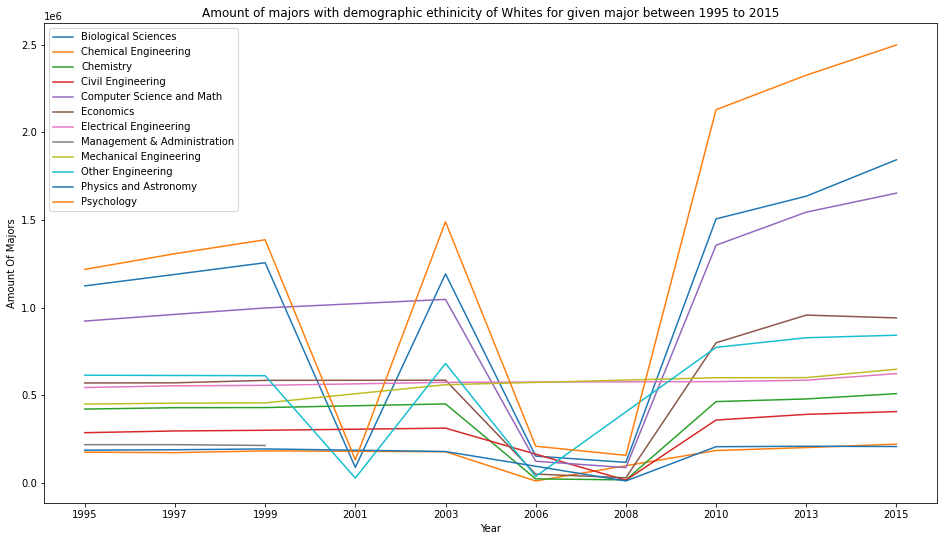

In [4]:
# dewp = demographics ethnicity White plot
dewp_data = data
dewp_label = "Education.Major"
dewp_x = "Year"
dewp_y = "Demographics.Ethnicity.Whites"
dewp_xlabel = "Years"
dewp_ylabel = "Amount Of Majors"
dewp_labels = majors_of_interest
dewp_title = "Amount of majors with demographic ethinicity of White for given major between 1995 to 2015"

dm.plot_data(dewp_data, dewp_label, dewp_x, dewp_y, dewp_xlabel, dewp_ylabel, dewp_labels, dewp_title)

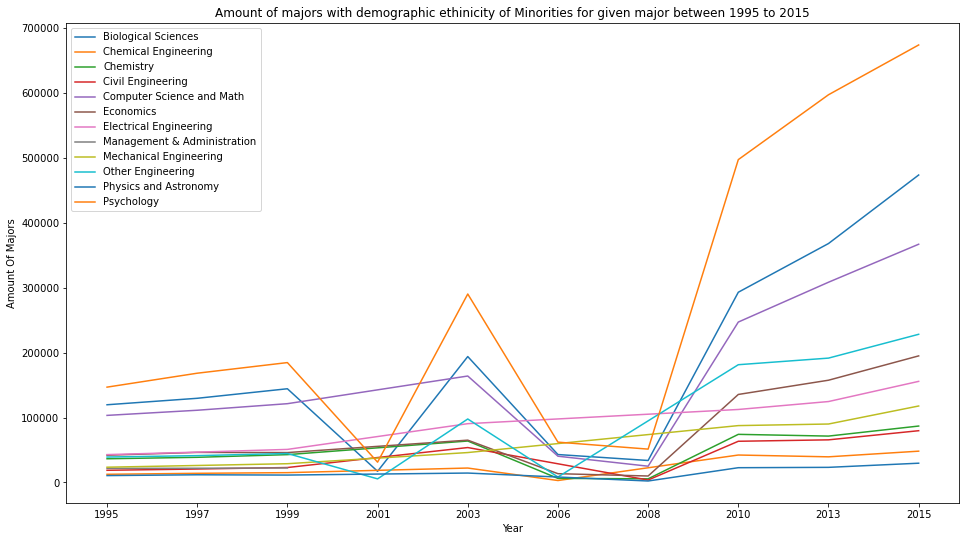

In [5]:
deap_data = data
deap_label = ["Education.Major", "Education.Major", "Education.Major"]
deap_x = ["Year", "Year", "Year"]
deap_y = ["Demographics.Ethnicity.Asians", "Demographics.Ethnicity.Whites", "Demographics.Ethnicity.Minorities"]
deap_xlabel = ["Year", "Year", "Year"]
deap_ylabel = ["Amount Of Majors", "Amount Of Majors",  "Amount Of Majors"]
deap_labels = majors_of_interest
deap_title = ["Amount of majors with demographic ethinicity of Asian for given major between 1995 to 2015",
              "Amount of majors with demographic ethinicity of Whites for given major between 1995 to 2015", 
              "Amount of majors with demographic ethinicity of Minorities for given major between 1995 to 2015"]

dm.plot_data(deap_data, deap_label, deap_x, deap_y, deap_xlabel, deap_ylabel, deap_labels, deap_title, 3)

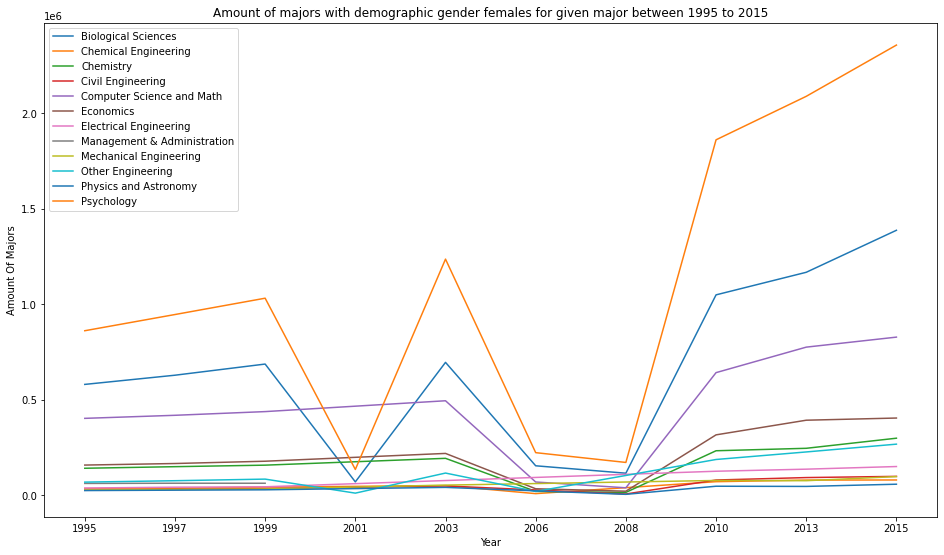

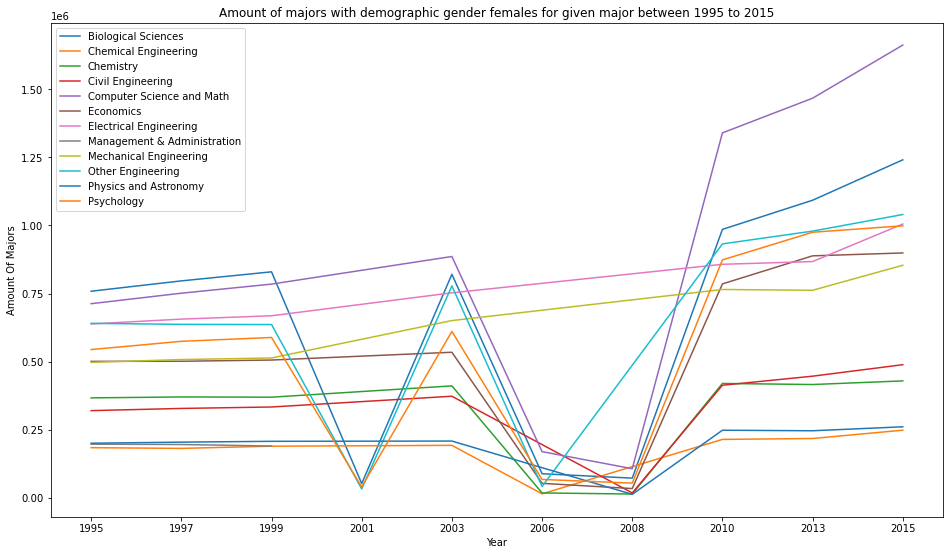

In [6]:
# dgfp = demographics gender female plot
dgfp_data = data
dgfp_label = ["Education.Major", "Education.Major"]
dgfp_x = ["Year", "Year"]
dgfp_y = ["Demographics.Gender.Females", "Demographics.Gender.Males"]
dgfp_xlabel = ["Year", "Year"]
dgfp_ylabel = ["Amount Of Majors", "Amount Of Majors"]
dgfp_labels = majors_of_interest
dgfp_title = ["Amount of majors with demographic gender females for given major between 1995 to 2015", 
              "Amount of majors with demographic gender females for given major between 1995 to 2015"]

dm.plot_data(dgfp_data, dgfp_label, dgfp_x, dgfp_y, dgfp_xlabel, dgfp_ylabel, dgfp_labels, dgfp_title, 2)

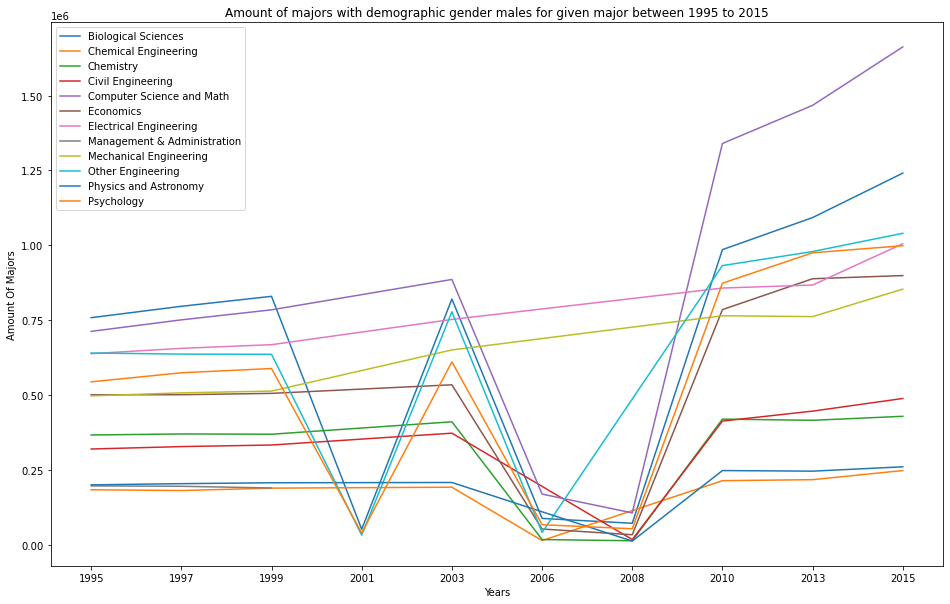

In [7]:
# dgmp = demographics gender m plot
dgmp_data = data
dgmp_label = "Education.Major"
dgmp_x = "Year"
dgmp_y = "Demographics.Gender.Males"
dgmp_xlabel = "Years"
dgmp_ylabel = "Amount Of Majors"
dgmp_labels = majors_of_interest
dgmp_title = "Amount of majors with demographic gender males for given major between 1995 to 2015"

dm.plot_data(dgmp_data, dgmp_label, dgmp_x, dgmp_y, dgmp_xlabel, dgmp_ylabel, dgmp_labels, dgmp_title)

### Clustering of Data through Meanshift

In [8]:
meanshift_data = data[["Salaries.Mean", "Education.Major", "Demographics.Ethnicity.Asians", "Demographics.Ethnicity.Minorities", "Demographics.Ethnicity.Whites", "Demographics.Gender.Females", "Demographics.Gender.Males"]]
meanshift_data.head()



,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males
ID,,,,,,,
47,54523.54,Biological Sciences,92708,119813,1123768,579614,758494
48,58896.72,Chemical Engineering,29745,12644,175338,33731,183996
49,60697.60,Chemistry,49393,36562,421046,140363,366865
50,51758.63,Civil Engineering,39586,18806,286397,24979,320059
51,49672.61,Computer Science and Math,87310,103423,923026,401758,712760


In [9]:
# Convert Major to categorical value in numeric form
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
meanshift_data['Education.Major'] = le.fit_transform(meanshift_data['Education.Major'].astype(str))
meanshift_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males
ID,,,,,,,
47,54523.54,0,92708,119813,1123768,579614,758494
48,58896.72,1,29745,12644,175338,33731,183996
49,60697.60,2,49393,36562,421046,140363,366865
50,51758.63,3,39586,18806,286397,24979,320059
51,49672.61,4,87310,103423,923026,401758,712760


In [12]:
# No null value data, so it doesnt need dropping:
meanshift_data[meanshift_data.isnull().any(axis=1)]

,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males
ID,,,,,,,


In [13]:
#Meanshift
from sklearn.cluster import MeanShift

analyzer = MeanShift(bandwidth=30) #We will provide only bandwith in hyperparameter . The smaller values of bandwith result in tall skinny kernels & larger values result in short fat kernels.
#We found the bandwith using the estimate_bandiwth function mentioned in below cell.
analyzer.fit(meanshift_data)

MeanShift(bandwidth=30, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [17]:
import numpy as np 

#Below is a helper function to help estimate a good value for bandwith based on the data.
"""from sklearn.cluster import estimate_bandwith
estimate_bandwith(meanshift_data)"""   #This runs in quadratic time hence take a long time
'from sklearn.cluster import estimate_bandwith\nestimate_bandwith(meanshift_data)'
labels = analyzer.labels_
np.unique(labels)



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

In [21]:
#We will add a new column in dataset which shows the cluster the data of a particular row belongs to.
meanshift_data['cluster_group'] = np.nan
data_length=len(meanshift_data)
for i in range(data_length):
    meanshift_data.iloc[i,meanshift_data.columns.get_loc('cluster_group')] = labels[i]
meanshift_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,cluster_group
ID,,,,,,,,
47,54523.54,0,92708,119813,1123768,579614,758494,70.0
48,58896.72,1,29745,12644,175338,33731,183996,58.0
49,60697.60,2,49393,36562,421046,140363,366865,55.0
50,51758.63,3,39586,18806,286397,24979,320059,73.0
51,49672.61,4,87310,103423,923026,401758,712760,78.0
...,...,...,...,...,...,...,...,...
485,109173.61,6,375520,155870,623271,149404,1005257,1.0
496,98533.83,8,184209,117901,648456,96727,853839,5.0
503,96287.14,9,235954,228427,842463,266635,1040210,7.0
